### **Recomendation system MODISTA - Provides outfits according to your fashion**
Dataset:
https://www.kaggle.com/datasets/ishanshrivastava28/sales-transaction-dataset-with-product-details


**The following commands are used to access Google Drive from Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing TensorFlow and Kerass**

In [ ]:
pip install tensorflow keras

**Import Required Libraries**

numpy, pandas, matplotlib, seaborn, tensorflow, and scikit-learn.

**Disabling Warnings**

then to disable warnings that may appear during code execution.
`warnings.filterwarnings('ignore')`

This is done to keep the console output clean and focused on important results without being distracted by irrelevant warnings.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

Some of the processes executed in the following code are:
1. Retrieve the File ID from the Sharing Link.
2. A direct link is created to the csv file in the drive.
3. Read CSV File from Link with read_csv
4. Filtering the data is done by removing rows that have a specific Product_Description.

In [ ]:
import pandas as pd
# df = pd.read_csv('/content/drive/My Drive/Sales_Product_Details.csv')
url = 'https://drive.google.com/file/d/1VsaQ0zYcAARmu11GIkCCUm32L_d0Mkok/view?usp=sharing'

# Mengambil ID file dari tautan
file_id = url.split('/')[-2]

# Membuat tautan langsung ke file CSV
download_url = 'https://drive.google.com/uc?id=' + file_id

# Membaca file CSV dari tautan
df = pd.read_csv(download_url)

df = df[df['Product_Description'] != 'Pyjamas']

After the data is read, the next process is:
1. Filter the data based on Product_Description by deleting all rows in the DataFrame where the Product_Description column is `Pyjamas`.
2. Delete columns that are not needed by using drop.
3. Convert Date column from string format to `%Y%m%d` format.
4. Delete duplicate rows in the DataFrame
5. Delete all rows in the DataFrame that contain NaN values or empty values

In [ ]:

# Data cleaning and preprocessing
df = df[df['Product_Description'] != 'Pyjamas']
df.drop(columns=['Customer_ID', 'Sales_Revenue', 'Product_Category', 'Product_Line', 'Raw_Material', 'Latitude', 'Longitude'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Using the `unicode_escape` encoding when reading CSV files is useful for handling characters that cannot be interpreted with the default encoding.

In [ ]:
df = pd.read_csv(download_url,encoding='unicode_escape') # used `unicode_escape` to handel encoding
df

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20240206,40,360,10,37.70,377.00,Polo Shirts,Womenswear,Trousers,Fabrics,Worcester,40.885497,73.661005
1,20230630,17,391,5,89.26,446.30,Tshirts,Accessories,Shoes,Wool,Truro,60.438329,98.422007
2,20240311,2,329,10,61.05,610.50,Ties,Menswear,Tops,Leather,Wells,6.882673,-81.830803
3,20240131,36,321,5,41.68,208.40,Casual Shirts,Womenswear,Shoes,Cashmere,Truro,-84.576955,131.171699
4,20240517,3,368,4,29.60,118.40,Pyjamas,Womenswear,Leathers,Polyester,Winchester,61.287203,-158.397984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20240305,64,278,6,87.43,524.58,Polo Shirts,Womenswear,Shoes,Fabrics,York,12.705542,-2.975480
4996,20240425,55,235,9,28.51,256.59,Ties,Sports,Leathers,Polyester,York,70.863733,69.521578
4997,20230812,8,370,5,23.76,118.80,Casual Shirts,Menswear,Shoes,Leather,Winchester,46.513581,90.610376
4998,20240516,41,290,8,78.44,627.52,Knitwear,Menswear,Trousers,Polyester,York,60.779195,159.432552



Feature engineering is the process of creating additional features from existing data that can help in machine learning analysis and models. In this case, we will add some new features based on the `Date` column.

In [ ]:
# Feature engineering
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['DayOfMonth'] = pd.to_datetime(df['Date']).dt.day
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

The next process is category encoding, a technique in data preprocessing that converts categorical data (text or labels) into a numerical format so that it can be used in machine learning algorithms. The steps are:
1. Encoder Initialization
2. Encoding the 'Region' column. This is done by converting the Region column from categorical data (e.g., 'North', 'South', 'East', 'West') to numerical data (e.g., 0, 1, 2, 3).
3. Changing the Data Type of the 'Product_ID' Column. This is done by changing the data type of the Product_ID column to a string.

In [ ]:
# Encoding categorical variables
encoder = LabelEncoder()
df['Region'] = encoder.fit_transform(df['Region'])
df['Product_ID'] = df['Product_ID'].astype(str)

Next is the Data Filtering Process Based on Criteria. This process includes:
1. Calculating the Frequency of 'Region' and 'Product_ID'
2. Retrieving the 'Top' List Based on Frequency
3. Filtering Data Based on Criteria

In [ ]:
# Filter data based on criteria (adjust this based on your specific requirements)
# Example: Keep top countries and top stocks
top_countries = df['Region'].value_counts().head(10).index.to_list()
top_stocks = df['Product_ID'].value_counts().head(50).index.to_list()
df_ = df[(df['Region'].isin(top_countries)) & (df['Product_ID'].isin(top_stocks))]


The Data Validation and Splitting process ensures that there are enough samples in the filtered dataset to be able to split the data into training and testing sets. After that, features and labels are separated for machine learning model preparation. This process is done by Checking the Number of Samples and Separating Features and Labels.

In [ ]:
# Check if there are enough samples for train-test split
if len(df_) < 2:  # Adjust this threshold as needed
    raise ValueError("Not enough samples remaining after preprocessing. Adjust your preprocessing steps or criteria.")

X = df_.drop(columns=['Quantity', 'Product_Description', 'Date'])
y = df_['Quantity']

Prepare the target variable 'y' for classification, perform one-hot coding on categorical variables in feature 'X', and split the data into training and testing sets using train_test_split.
This process is carried out with the following steps:
1. Encoding Target Variable 'y' for Classification
2. Reshape 'y' to Ensure Appropriate Dimensions
3. Ensure the Label Value is in the Correct Range
4. One-Hot Coding of Categorical Variables in 'X'
5. Division of Data into Training and Testing Sets

In [ ]:

# Ensure target variable 'y' is suitable for classification
y = encoder.fit_transform(y)

# Reshape y to ensure it is one-dimensional
y = y.reshape(-1)

# Make sure label values are in the correct range
num_classes = len(np.unique(y))
if np.max(y) >= num_classes:
    raise ValueError(f"Label values should be in the range [0, {num_classes-1}]. Found label {np.max(y)}.")

X = pd.get_dummies(X, columns=X.select_dtypes('object').columns, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Then there is the standard scaling process. At this stage, the features in the data that have been split into training and testing sets are adjusted to a standard scale. This is important in some machine learning algorithms because some models can have problems if the features are scaled differently.

In [ ]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The modeling process is carried out as follows.

**Note:**
- Dropout Layer: The Dropout Layer is used to reduce overfitting by reducing the correlation between neurons during training.
- Activation Functions: Activation functions such as 'relu' and 'softmax' are used to introduce non-linearity into the model and generate class distribution probabilities as the final output.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(132, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


Once you have designed the neural network model architecture, the next step is to compile the model. The compilation process involves setting up the optimizer, loss function, and evaluation metrics that will be used during model training and evaluation.

In [ ]:
# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Metric for accuracy


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               9240      
                                                                 
 dropout (Dropout)           (None, 132)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4256      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                2

This stage is the training process of the machine learning model that you have designed and compiled earlier. This process involves using training data to adjust the parameters of the model in order to produce accurate predictions.

In [ ]:

# Callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, callbacks=[callback])


Epoch 1/100
40/40 [==============================] - 3s 20ms/step - loss: 2.4047 - accuracy: 0.1004 - val_loss: 2.3098 - val_accuracy: 0.0987
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 2.3140 - accuracy: 0.1211 - val_loss: 2.3085 - val_accuracy: 0.0924
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 2.2827 - accuracy: 0.1243 - val_loss: 2.3090 - val_accuracy: 0.1146
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 2.2660 - accuracy: 0.1291 - val_loss: 2.3043 - val_accuracy: 0.0955
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 2.2472 - accuracy: 0.1673 - val_loss: 2.2800 - val_accuracy: 0.1019
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 2.1969 - accuracy: 0.1904 - val_loss: 2.2381 - val_accuracy: 0.1242
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1277 - accuracy: 0.2143 - val_loss: 2.1743 - val_accuracy: 0.1369
Epoch 8/100


At this stage, you are evaluating the performance of your model using the test data `(X_test_scaled and y_test)`. This evaluation is done after training is complete to gain an understanding of how well your model can generalize on data that has never been seen before.

In [ ]:

# Evaluating the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=-1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


10/10 [==============================] - 0s 3ms/step
Accuracy: 0.7707006369426752


In [ ]:
# preds = model.predict(X_test_scaled)
y_pred_probs

array([[1.6784251e-11, 2.1083655e-09, 4.6272950e-07, ..., 7.6968427e-05,
        4.5365032e-06, 2.7294820e-07],
       [7.1530801e-04, 1.9145584e-02, 1.4124812e-01, ..., 2.5498251e-11,
        1.0090549e-13, 2.3410157e-15],
       [2.8773246e-02, 1.9095275e-01, 7.5655705e-01, ..., 1.2842503e-10,
        4.7872871e-13, 3.0552079e-14],
       ...,
       [1.7184378e-17, 2.9915232e-17, 1.3721851e-12, ..., 1.6743846e-01,
        4.6825653e-01, 3.3699217e-01],
       [4.7982424e-01, 4.4859609e-01, 7.1558915e-02, ..., 3.6964747e-20,
        6.5852141e-25, 3.9609033e-26],
       [2.3045230e-01, 7.4814659e-01, 2.1400841e-02, ..., 7.2971676e-35,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

To plot the training and validation loss (and optionally metrics) over epochs, you typically use the history object returned by the model.fit method.

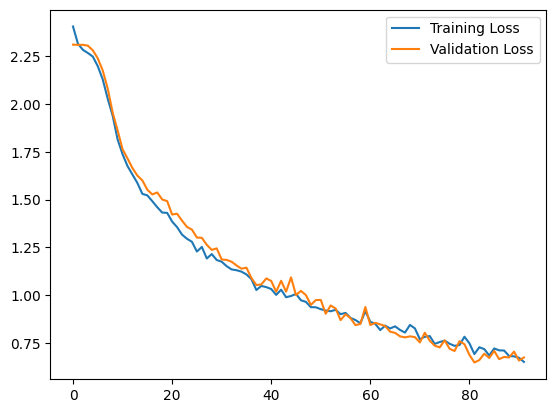

In [ ]:
Plot loss and metrics over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



Create a DataFrame `result`containing actual and predicted values for comparison

In [ ]:
# Creating a result DataFrame
result = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Prediction': y_pred.flatten()
    # 'Prediction': np.round(y_pred[:, 0, 0]).astype(int)

    })

In [ ]:
result

,Actual,Prediction
0,5,5
1,3,3
2,1,2
3,0,0
4,0,0
...,...,...
309,6,6
310,2,3
311,8,8
312,1,0


The R^2 score, also known as the coefficient of determination, is an evaluation metric used to measure how well the regression model fits the observed data.

In [ ]:
# Calculate R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9647179684741083


**Making a Recomender System**

This process is an implementation of a content-based product recommendation system using cosine similarity.

The following steps of the program start with user input which is then processed to find the corresponding product index in the dataset based on various criteria such as product ID, product description, product category, product line, raw materials, or unit price. After obtaining the corresponding product index, the program calculates the similarity between the user input product and all other products in the dataset using cosine similarity. This similarity score measures how similar the two products are in the feature space defined by the selected attributes.

Next, the program identifies the top 10 products that are most similar to the input product based on the calculated similarity score value. These products, along with their similarity score values, are displayed in the form of a DataFrame to provide product recommendations to the user based on preferences or attributes that are similar to the product they are looking for.

This method is useful in the context of content-based recommendation systems as it does not require historical data of other users, but relies on product attribute information to provide relevant and personalized recommendations to users based on the input they provide.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# model = tf.keras.models.load_model('recomender_model.h5')

# Get the user's input
user_input = input('Enter a Product : ')

# Function to get the product index based on different input types
def get_product_index(user_input):
    if user_input.isdigit():  # Check if the input is all digits (assuming Product_IDs are numeric)
        # Check if the Product_ID exists in the DataFrame
        if int(user_input) in df_['Product_ID'].values:
            return df_.loc[df_['Product_ID'] == int(user_input)].index[0]
        else:
            print("Product ID not found. Please enter a valid Product ID.")
            return None
    elif user_input in df_['Product_Description'].values:
        # Check if the Product_Description exists in the DataFrame
        return df_.loc[df_['Product_Description'] == user_input].index[0]
    elif user_input in df_['Product_Category'].values:
        # Check if the Product_Category exists in the DataFrame
        return df_.loc[df_['Product_Category'] == user_input].index[0]
    elif user_input in df_['Product_Line'].values:
        # Check if the Product_Line exists in the DataFrame
        return df_.loc[df_['Product_Line'] == user_input].index[0]
    elif user_input in df_['Raw_Material'].values:
        # Check if the Raw_Material exists in the DataFrame
        return df_.loc[df_['Raw_Material'] == user_input].index[0]
    elif user_input in df_['Unit_Price'].values:
        # Check if the Unit_Price exists in the DataFrame
        return df_.loc[df_['Unit_Price'] == user_input].index[0]
    else:
        print("Product not found. Please enter a valid product information.")
        return None

# Get the product index
# product_index = get_product_index(user_input)
product_index = get_product_index(user_input)

# Check if the product index is found
if product_index is not None:
    # Calculate the cosine similarity between the user's input product and all other products
    similarity_scores = cosine_similarity([X_train_scaled[product_index]], X_train_scaled)[0]

    # Get the indices of the top 10 most similar products
    top_10_indices = np.argsort(similarity_scores)[::-1][1:11]  # Exclude the input product itself

    # Create a DataFrame of the top 10 most similar products
    recommended_products = pd.DataFrame({
        'Product_ID': df_.iloc[top_10_indices]['Product_ID'].values,
        'Product_Description': df_.iloc[top_10_indices]['Product_Description'].values,
        'Product_Category': df_.iloc[top_10_indices]['Product_Category'].values,
        'Product_Line': df_.iloc[top_10_indices]['Product_Line'].values,
        'Raw_Material': df_.iloc[top_10_indices]['Raw_Material'].values,
        'Unit_Price': df_.iloc[top_10_indices]['Unit_Price'].values,
        'Similarity Score': similarity_scores[top_10_indices]
    })

    # Display the recommended products
    print(recommended_products)
else:
    print("No recommendations available. Please enter a valid product.")



Enter a Product : Wool
  Product_ID Product_Description Product_Category Product_Line Raw_Material  \
0        341              Sweats           Sports     Trousers       Cotton   
1        264       Formal Shirts      Accessories        Shoes      Fabrics   
2        359             Pyjamas       Womenswear         Tops         Wool   
3        246               Suits           Sports     Leathers    Polyester   
4        261              Shorts       Womenswear         Tops      Fabrics   
5        213       Formal Shirts         Menswear     Leathers         Wool   
6        282               Pants         Menswear        Shoes       Cotton   
7        337         Polo Shirts      Accessories         Tops      Fabrics   
8        276       Casual Shirts           Sports     Trousers    Polyester   
9        220       Casual Shirts       Womenswear     Leathers         Wool   

   Unit_Price  Similarity Score  
0       43.74          0.848748  
1       43.00          0.792129  
2    

**Training dan Saving Model**

To save the TensorFlow model into a file with .h5 format, you can use the `save()` method on the model object.

Format .h5: This is a commonly used file format for saving TensorFlow models after they have been trained. It supports saving the model structure, configuration, and weight and parameter values that have been set during the training process.

In [ ]:
# Save the TensorFlow model as model.h5
model.save('recomender_model.h5')

In the code you show, you use the pickle module to save the scaled `X_train_scaled `data into a file with a `.pkl` extension.

In [ ]:
import pickle

# Save the scaled training data using pickle
with open('X_train_scaled.pkl', 'wb') as f:
    pickle.dump(X_train_scaled, f)
